In [1]:
import numpy as np
import matplotlib.pyplot as plt

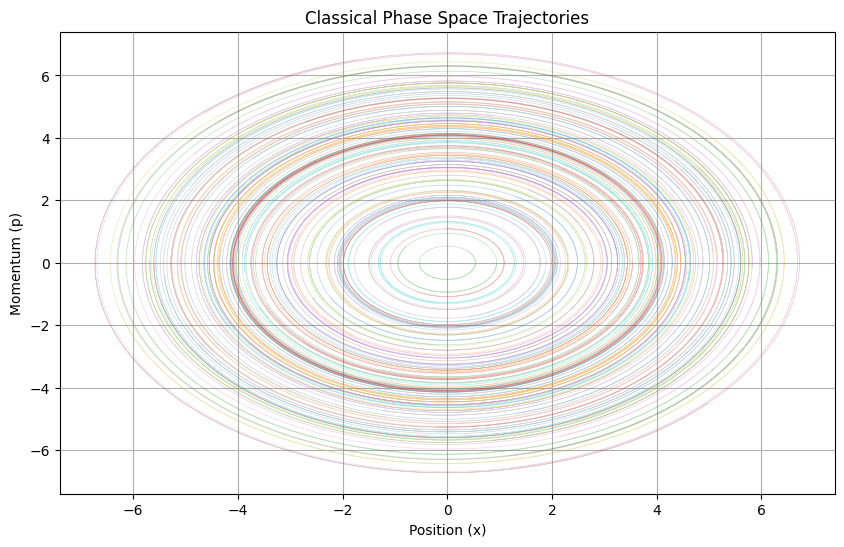

In [2]:
def potential(x):
    return 0.5 * x**2

### Monte Carlo parameters
num_samples = 10000
t_max= 10.0
time_steps = 1000
dt = t_max / time_steps

## Initialize arrays for phase space
x_samples= np.random.uniform(-5, 5, num_samples)
p_samples = np.random.uniform(-5, 5, num_samples)

trajectories = []

## Monte carlo simulation for phase space trajectories
for i in range(num_samples):
    x, p = x_samples[i], p_samples[i]
    x_traj, p_traj = [x], [p]
    
    for _ in range(time_steps):
        ## Update momentum dp/dt = -dV/dx = x
        p -= dt * (x)
        
        ## Update position
        x += dt * p
        x_traj.append(x)
        p_traj.append(p)
        
    trajectories.append((x_traj, p_traj))
    
## Plotting phase space trajectories:
plt.figure(figsize=(10, 6))
for traj in trajectories[:100]:  # Plot only a subset for clarity
    plt.plot(traj[0], traj[1], alpha=0.3, lw=0.5)

plt.title("Classical Phase Space Trajectories")
plt.xlabel("Position (x)")
plt.ylabel("Momentum (p)")
plt.grid(True)
plt.show()
        

### Generalising above function for any given function

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_phase_space(potential, potential_derivative, x_range=(-3, 3), p_range=(-3, 3), num_samples=1000, t_max=10.0, time_steps=1000):
    """
    Simulates classical phase-space trajectories for a given potential.

    Parameters:
        potential (function): The potential function V(x).
        potential_derivative (function): The derivative of the potential, dV/dx.
        x_range (tuple): Range of initial positions (min, max).
        p_range (tuple): Range of initial momenta (min, max).
        num_samples (int): Number of random samples.
        t_max (float): Maximum time for integration.
        time_steps (int): Number of time steps.

    Returns:
        trajectories (list): A list of phase space trajectories [(x_traj, p_traj), ...].
    """
    # Time step size
    dt = t_max / time_steps

    # Initialize arrays for initial positions and momenta
    x_samples = np.random.uniform(x_range[0], x_range[1], num_samples)
    p_samples = np.random.uniform(p_range[0], p_range[1], num_samples)

    trajectories = []

    # Monte Carlo simulation for phase space trajectories
    for i in range(num_samples):
        x, p = x_samples[i], p_samples[i]
        x_traj, p_traj = [x], [p]

        for _ in range(time_steps):
            # Update momentum using d(p)/dt = -dV/dx
            p -= dt * potential_derivative(x)
            
            # Update position using d(x)/dt = p
            x += dt * p

            x_traj.append(x)
            p_traj.append(p)

        trajectories.append((x_traj, p_traj))

    return trajectories

def plot_phase_space(trajectories, max_trajectories=500):
    """
    Plots the phase-space trajectories.

    Parameters:
        trajectories (list): List of phase space trajectories [(x_traj, p_traj), ...].
        max_trajectories (int): Maximum number of trajectories to plot.
    """
    plt.figure(figsize=(10, 6))
    for traj in trajectories[:max_trajectories]:
        plt.plot(traj[0], traj[1], alpha=0.3, lw=0.5)

    plt.title("Classical Phase Space Trajectories")
    plt.xlabel("Position (x)")
    plt.ylabel("Momentum (p)")
    plt.grid(True)
    plt.show()
